In [1]:
%load_ext autoreload
%autoreload 2
from helpers import *
from networks import *
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

/Users/wlan/miniforge3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = 5 # > 10 is bad
lr = 0.001
mom = 0.5
epochs = 50
networ_type = 'FNN' #FNN CNN1 CNN2
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [3]:
device

device(type='mps')

In [4]:
train_x, train_y, test_x, test_y = init_data("train.csv", 0.7)
train = MyDataset(train_x, train_y)
test = MyDataset(test_x, test_y)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [5]:
num_features = train.x.shape[1]
num_features

305

In [6]:
net = eval(networ_type)()
net.to(device)
net

FNN(
  (fc1): Linear(in_features=305, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)

In [7]:
criterion = nn.MSELoss()
# criterion = nn.L1Loss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=mom)

In [11]:
los = []
tlos = []
for epoch in range(epochs):
    tot_loss = 0.0
    net.train()
    for i, (inputs, labels) in enumerate(tqdm(train_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device) # Move to GPU / CPU
        optimizer.zero_grad() # zero the parameter gradients

        labels = labels.unsqueeze(-1) # Batch color value
        # forward + backward + optimize
        # inputs = inputs.unsqueeze(1)
        outputs = net(inputs)
        # print(outputs.shape, labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        tot_loss += loss.item()
    # print(tot_loss)
    ttot_loss = 0.0
    net.eval()
    for i, (inputs, labels) in enumerate(test_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device) # Move to GPU / CPU
        with torch.no_grad():
            labels = labels.unsqueeze(-1) # Batch color value
            # inputs = inputs.unsqueeze(1) #.to_sparse()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
        ttot_loss += loss.item()
    los.append(tot_loss)
    tlos.append(ttot_loss)
    print(epoch, tot_loss, ttot_loss)

100%|██████████| 205/205 [00:00<00:00, 254.06it/s]


0 200.63299611210823 76.65651465952396


100%|██████████| 205/205 [00:00<00:00, 382.97it/s]


1 146.41281391467783 44.82844049856067


100%|██████████| 205/205 [00:00<00:00, 364.27it/s]


2 54.903125554323196 21.483244746923447


100%|██████████| 205/205 [00:00<00:00, 372.13it/s]


3 28.818146892357618 17.916712424717844


100%|██████████| 205/205 [00:00<00:00, 375.27it/s]


4 22.01462527149124 16.525269189383835


100%|██████████| 205/205 [00:00<00:00, 375.75it/s]


5 17.38272538036108 16.048470922280103


100%|██████████| 205/205 [00:00<00:00, 382.19it/s]


6 14.753761515486985 16.07771577173844


100%|██████████| 205/205 [00:00<00:00, 379.69it/s]


7 13.115277963806875 15.33262433251366


100%|██████████| 205/205 [00:00<00:00, 376.85it/s]


8 11.692368379910477 14.987854779697955


100%|██████████| 205/205 [00:00<00:00, 381.44it/s]


9 10.532913227565587 15.023454336915165


100%|██████████| 205/205 [00:00<00:00, 378.74it/s]


10 9.40582283551339 14.464788003824651


100%|██████████| 205/205 [00:00<00:00, 383.94it/s]


11 8.946448597940616 14.206175168044865


100%|██████████| 205/205 [00:00<00:00, 381.77it/s]


12 8.231115871691145 14.147685359697789


100%|██████████| 205/205 [00:00<00:00, 384.38it/s]


13 7.498114297668508 14.57682790979743


100%|██████████| 205/205 [00:00<00:00, 381.66it/s]


14 7.051622649812998 13.899928336497396


100%|██████████| 205/205 [00:00<00:00, 383.39it/s]


15 6.586335551459342 13.646938007790595


100%|██████████| 205/205 [00:00<00:00, 382.68it/s]


16 6.258895250939531 13.606996349524707


100%|██████████| 205/205 [00:00<00:00, 384.56it/s]


17 5.675924337585457 13.295329436194152


100%|██████████| 205/205 [00:00<00:00, 378.48it/s]


18 5.43939408112783 13.196130053605884


100%|██████████| 205/205 [00:00<00:00, 383.42it/s]


19 5.16454936566879 13.012788033112884


100%|██████████| 205/205 [00:00<00:00, 381.91it/s]


20 4.8377474074368365 12.849511912558228


100%|██████████| 205/205 [00:00<00:00, 380.75it/s]


21 4.538996695948299 12.805412190500647


100%|██████████| 205/205 [00:00<00:00, 383.43it/s]


22 4.280141703107802 12.650827990844846


100%|██████████| 205/205 [00:00<00:00, 383.46it/s]


23 4.0826049171737395 12.601752955000848


100%|██████████| 205/205 [00:00<00:00, 382.77it/s]


24 3.8588683098205365 12.490299944300205


100%|██████████| 205/205 [00:00<00:00, 382.83it/s]


25 3.691841809952166 12.364946236368269


100%|██████████| 205/205 [00:00<00:00, 382.84it/s]


26 3.472795783658512 12.290170373395085


100%|██████████| 205/205 [00:00<00:00, 382.62it/s]


27 3.3084564897581004 12.102898085024208


100%|██████████| 205/205 [00:00<00:00, 384.57it/s]


28 3.1128148283460177 12.001309029292315


100%|██████████| 205/205 [00:00<00:00, 382.74it/s]


29 2.9880947789060883 12.01953980140388


100%|██████████| 205/205 [00:00<00:00, 375.15it/s]


30 2.80251792864874 11.745213971473277


100%|██████████| 205/205 [00:00<00:00, 382.44it/s]


31 2.71760703419568 11.66374437045306


100%|██████████| 205/205 [00:00<00:00, 382.29it/s]


32 2.544605147995753 11.444099430926144


100%|██████████| 205/205 [00:00<00:00, 376.23it/s]


33 2.3734376983338734 11.696849551051855


100%|██████████| 205/205 [00:00<00:00, 381.96it/s]


34 2.321389416581951 11.377033707685769


100%|██████████| 205/205 [00:00<00:00, 382.98it/s]


35 2.1754551846534014 11.259011371992528


100%|██████████| 205/205 [00:00<00:00, 382.30it/s]


36 2.086412587279483 11.148236963897943


100%|██████████| 205/205 [00:00<00:00, 382.02it/s]


37 1.979453437088523 11.068017098121345


100%|██████████| 205/205 [00:00<00:00, 380.59it/s]


38 1.8931722410488874 11.04196373745799


100%|██████████| 205/205 [00:00<00:00, 380.43it/s]


39 1.8018178954080213 10.901879197917879


100%|██████████| 205/205 [00:00<00:00, 382.99it/s]


40 1.7355733592629576 10.815109361894429


100%|██████████| 205/205 [00:00<00:00, 383.02it/s]


41 1.652834832645567 10.72573717776686


100%|██████████| 205/205 [00:00<00:00, 379.26it/s]


42 1.557857758947648 10.729964659549296


100%|██████████| 205/205 [00:00<00:00, 379.48it/s]


43 1.4924775388717535 10.56233166065067


100%|██████████| 205/205 [00:00<00:00, 380.04it/s]


44 1.437791256525088 10.55739627033472


100%|██████████| 205/205 [00:00<00:00, 380.01it/s]


45 1.3727481025780435 10.41318379715085


100%|██████████| 205/205 [00:00<00:00, 379.77it/s]


46 1.3139661585591966 10.33659332152456


100%|██████████| 205/205 [00:00<00:00, 378.80it/s]


47 1.2771484002296347 10.363629072904587


100%|██████████| 205/205 [00:00<00:00, 380.30it/s]


48 1.2115840722835856 10.261341154575348


100%|██████████| 205/205 [00:00<00:00, 383.33it/s]


49 1.1644716485534445 10.21201189700514


In [12]:
net.eval()
all_loss_train = []
with torch.no_grad():
    tot_loss = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.unsqueeze(1) #.to_sparse()
        outputs = net(inputs).ravel()
        all_loss_train.extend((abs(outputs - labels) / abs(labels)).tolist())

100%|██████████| 205/205 [00:00<00:00, 548.38it/s]


In [13]:
all_loss_test = []
with torch.no_grad():
    tot_loss = 0
    for i, (inputs, labels) in enumerate(tqdm(test_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.unsqueeze(1)
        outputs = net(inputs).ravel()
        all_loss_test.extend((abs(outputs - labels) / abs(labels)).tolist())
    

100%|██████████| 88/88 [00:00<00:00, 612.57it/s]


In [14]:
all_loss_train = np.array(all_loss_train)
all_loss_test = np.array(all_loss_test)

In [15]:
len(np.where(all_loss_train < 1)[0]) / len(all_loss_train), len(np.where(all_loss_test < 1)[0]) / len(all_loss_test)

(0.9569049951028403, 0.8542141230068337)

In [16]:
good_pred_train = all_loss_train[np.where(all_loss_train < 1)]
good_pred_test = all_loss_test[np.where(all_loss_test < 1)]
good_pred_train.mean(), good_pred_train.std(), good_pred_test.mean(), good_pred_test.std()

(0.11162824643150521,
 0.15400784734966777,
 0.24888408980208138,
 0.2259928474411862)

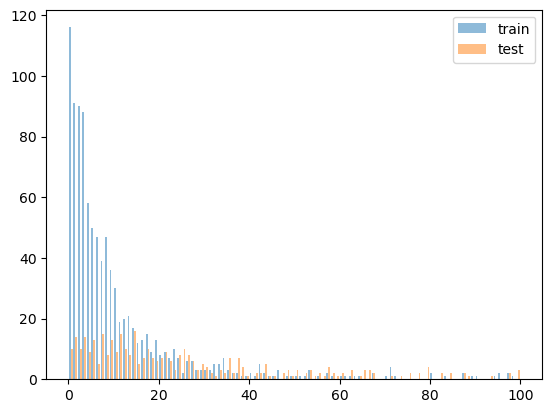

In [17]:
bins = range(101)
plt.hist([good_pred_train*100, good_pred_test*100], bins=bins, alpha=0.5, label=["train", "test"])
plt.legend()
plt.show()